# Student_Att

## 1.3 - Student Attendance

## Task Description

Write a Python program to find out the attendance record of a student. The
program must use the attendance records in CWDatabase.db. Save the program
as Student_Att.ipynb.
Given student ID, your program should produce a list which shows weekly
attendance of all the modules, and appropriately visualises the list by using the
Matplotlib module.

Firstly, necessary modules are imported into the notebook:

In [1]:
# import modules
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Define Variables

Note: The order you enter the modules in does not matter.

In [2]:
def define_variables_1():
    """
    This function prompts the user to enter a student ID and two module codes.
    
    Args:
    None
    
    Returns:
    student_ID, mod1, mod2: Users input for each variable.
    """
    student_ID = input("Please enter a student ID (e.g. 1, 240):")
    mod1 = input("Please enter module 1 code (e.g. 22COA122):")
    mod2 = input("Please enter module 2 code (e.g. 22COA111 ):")
    return student_ID, mod1, mod2

## Find average weekly attendance for Module 1

Note: While the initial dataframe has Na values for students who have authorised absences, I have opted to use fillna(0) to view these as absent regardless of the circumstances. While I understand that this is not the most optimal method, this is the logic I have used in order to determine how the students attendances are calculated.

This same logic will be used consistently throughout the entire notebook.

In [3]:
def avg_weekly_att_mod1(mod1, student_ID):
    """
    This function filters the SQL table to only show data for a specific
    student ID. It reads the attendance and sessions table for the desired
    module, merges the dataframes, groups by week, and calculates the mean
    attendance.
    A validity check is present to print a message if ID does not exist.
    
    Args:
    mod1 (str): The module code entered by the user in the previous function.
    student_ID (str): The ID of the student who the weekly average attendance
    is being calculated for.
    
    Returns:
    stu_avg_module_1 (pd.DataFrame): A dataframe containing weekly average
    attendance of the student in the provided module (mod1).
    """
    conn = sqlite3.connect("CWDatabase.db")
    df1_student_data = pd.read_sql_query\
    (f"SELECT * FROM '{mod1}ModuleRegister_attendance' WHERE s_id = {student_ID}",
     conn, index_col = ['s_id'])
    
    # validity check of student ID:
    if df1_student_data.empty:
        print(f"ID {student_ID} not found in the sql database")
    
    df1_week_data = pd.read_sql_query\
    (f"SELECT Week, s_id FROM '{mod1}ModuleRegister_sessions'",
     conn, index_col = ['s_id'])

    # transpose attendance dataframe
    df1_student_data = df1_student_data.T

    #fill na with 0 so NaN does not hinder avg calculation
    df1_student_data = df1_student_data.fillna(0)

    # make the 's_id' in integer format
    df1_student_data.index = df1_student_data.index.astype(int)
    df1_week_data.index = df1_week_data.index.astype(int)

    # merge both dataframes
    stu_week_att_1 = pd.merge(df1_student_data, df1_week_data, left_index=True, right_index=True, how='inner')

    # ensure index is still labelled correctly
    stu_week_att_1 = stu_week_att_1.rename_axis('s_id', axis = 0)
    
    #find weekly mean attendance in percentages
    stu_avg_module_1 = stu_week_att_1.groupby('Week').mean().mul(100)
    return stu_avg_module_1

## Find average weekly attendance for Module 2

In [4]:
def avg_weekly_att_mod2(mod2, student_ID):
    """
    This function filters the SQL table to only show data for a specific
    student ID. It reads the attendance and sessions table for the desired
    module, merges the dataframes, groups by week, and calculates the mean
    attendance.
    A validity check is present to print a message if ID does not exist.

    Args:
    mod2 (str): The module code entered by the user in the previous function.
    student_ID (str): The ID of the student who the weekly average attendance
    is being calculated for.
    
    Returns:
    stu_avg_module_2 (pd.DataFrame): A dataframe containing weekly average
    attendance of the student in the provided module (mod2).
    """
    conn = sqlite3.connect("CWDatabase.db")
    df2_student_data = pd.read_sql_query\
    (f"SELECT * FROM '{mod2}ModuleRegister_attendance' WHERE s_id = {student_ID}",
     conn, index_col = ['s_id'])
    
    # validity check of student ID:
    if df2_student_data.empty:
        print(f"ID {student_ID} not found in the sql database")
    
    df2_week_data = pd.read_sql_query\
    (f"SELECT Week, s_id FROM '{mod2}ModuleRegister_sessions'",
     conn,index_col = ['s_id'])
    
    # transpose attendance dataframe
    df2_student_data = df2_student_data.T

    #fill na with 0 so NaN does not hinder avg calculation
    df2_student_data = df2_student_data.fillna(0)

    # make the 's_id' in integer format
    df2_student_data.index = df2_student_data.index.astype(int)
    df2_week_data.index = df2_week_data.index.astype(int)

    # merge both dataframes
    stu_week_att_2 = pd.merge(df2_student_data, df2_week_data, left_index=True,
                              right_index=True, how='inner')

    # ensure index is still labelled correctly
    stu_week_att_2 = stu_week_att_2.rename_axis('s_id', axis = 0)

    #find weekly mean attendance in percentages
    stu_avg_module_2 = stu_week_att_2.groupby('Week').mean().mul(100)
    return stu_avg_module_2

## Combine relevant data into a single dataframe

In [5]:
def join_module_data(stu_avg_module_1, stu_avg_module_2, mod1, mod2, student_ID):
    """
    This function outer joins the average weekly attendance data for
    a student over both modules into one single pandas dataframe. 
    It also creates a suffix to differentiate columns.
    It then fills Na values with 0.
    
    Args:
    stu_avg_module_1 (pd.DataFrame): Dataframe containing avg attendance in
    mod1.
    stu_avg_module_2 (pd.DataFrame): Dataframe containing avg attendance in
    mod2.
    mod1 (str): Code for module 1
    mod2 (str): Code for module 2
    student_ID (str): ID of student for whom weekly attendance is being
    calculated.

    Returns:
    stu_att_df (pd.DataFrame): Dataframe containing combined averages for
    both modules.
    """
    # outer join merge on 'week' with a suffix to identify module
    stu_att_df = pd.merge(stu_avg_module_1, stu_avg_module_2, on = 'Week',
                          how = 'outer', suffixes = (f'_{mod1}',f'_{mod2}'))
    
    # in case new NaN form due to extra weeks
    stu_att_df = stu_att_df.fillna(0)
    return stu_att_df

## Create visualisation

In [6]:
def stu_att_graph(stu_att_df, mod1, mod2, student_ID):
    """
    This function creates a bar graph to show the weekly average atttendance
    of a student in two given modules. It uses the joined dataframe 'stu_att_df'
    to do this.
    
    Args:
    stu_avg_df (pd.DataFrame): Dataframe containing avg attendance in mod1.
    mod1 (str): Code for module 1
    mod2 (str): Code for module 2
    student_ID (str): ID of student for whom a graph is created.
    
    Returns:
    None: A bar graph is plotted using matplotlib.pyplot.
    """
    # Extract the 'Week',COA122%, COA111% columns from the DataFrame
    x = range(1, stu_att_df.shape[0] + 1)
    y1 = stu_att_df[f'{student_ID}_{mod1}']
    y2 = stu_att_df[f'{student_ID}_{mod2}']
    
    plt.bar([a-0.25 for a in x], y1, width = 0.4, label = mod1)
    plt.bar([a+0.25 for a in x], y2, width = -0.4, label = mod2)
    plt.xlabel('Week No')
    plt.ylabel('Attendance (%)')
    plt.legend(loc='upper left')
    plt.title(f"Attendance for Student: {student_ID}")
    plt.xticks(x)
    plt.grid()
    # Show the plot
    plt.show()

# Main Code

In [7]:
def main_student_att():
    """
    This is the main function that links all the previous functions into one.
    
    Args:
    None
    
    Returns:
    None
    """
    student_ID, mod1, mod2 = define_variables_1()
    stu_avg_module_1 = avg_weekly_att_mod1(mod1, student_ID)
    stu_avg_module_2 = avg_weekly_att_mod2(mod2, student_ID)
    stu_att_df = join_module_data(stu_avg_module_1, stu_avg_module_2,
                                  mod1, mod2, student_ID)
    
    print(f"Df below shows avg weekly attendance percentage for a student \n\
    with ID {student_ID} in both {mod1} and {mod2}:")
    display(stu_att_df)
    
    stu_att_figure = stu_att_graph(stu_att_df, mod1, mod2, student_ID)

## Main Test Code

This test code will make use of the two modules that are available (22COA122, 22COA111).

These can be used in either order, or substitued for an alternative module with the same format, as long as it is saved in the sql database through the correct pre-processing procedure in the previous notebook for CW_Preprocessing.

For this test code:
(Although any of these can be changed if you rerun the main function)

student_ID = 1

mod1 = 22COA122

mod2 = 22COA111

The output of the main test code will show a dataframe of weekly average attendances for both modules.
It will also show a bar graph which is created using the dataframe present.

Please enter a student ID (e.g. 1, 240):1
Please enter module 1 code (e.g. 22COA122):22COA122
Please enter module 2 code (e.g. 22COA111 ):22COA111
Df below shows avg weekly attendance percentage for a student 
    with ID 1 in both 22COA122 and 22COA111:


,1_22COA122,1_22COA111
Week,,
W1,66.666667,100.000000
W2,66.666667,66.666667
W3,66.666667,100.000000
W4,75.000000,100.000000
W5,66.666667,100.000000
W6,100.000000,0.000000


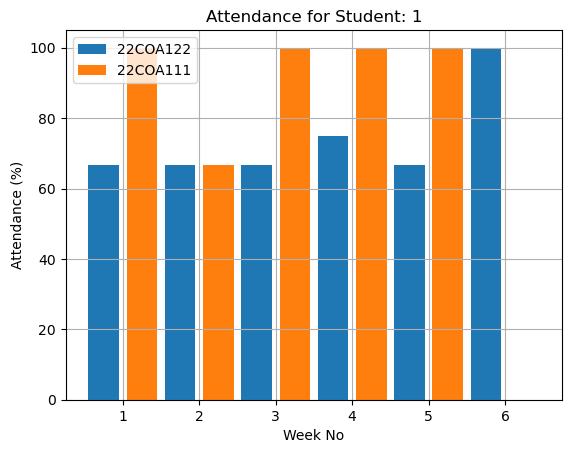

In [8]:
main_student_att()

# Testing all functions in the Notebook

Running the function (define_variables_1) shows that the user is asked to enter an input for all three variables. Printing the variables shows that python has successfully defined the variables with the user input.

In [9]:
student_ID, mod1, mod2 = define_variables_1()
print(student_ID, mod1, mod2)

Please enter a student ID (e.g. 1, 240):1
Please enter module 1 code (e.g. 22COA122):22COA122
Please enter module 2 code (e.g. 22COA111 ):22COA111
1 22COA122 22COA111


Running the function (avg_weekly_att_mod1) shows a list of weekly attendance for the specified student using the student_ID variable. It shows this weekly attendance for the specified module (module 1) that the user requests.

In [10]:
stu_avg_module_1 = avg_weekly_att_mod1(mod1, student_ID)

print(f"The dataframe below is for average weekly attendance of student\n\
{student_ID} in {mod1}:")

display(stu_avg_module_1)

The dataframe below is for average weekly attendance of student
1 in 22COA122:


,1
Week,
W1,66.666667
W2,66.666667
W3,66.666667
W4,75.000000
W5,66.666667
W6,100.000000


A similar function (avg_weekly_att_mod2) is created to calculate the weekly average attendance for the specified student in module 2 which is specified by the user.

In [11]:
stu_avg_module_2 = avg_weekly_att_mod2(mod2, student_ID)

print(f"The dataframe below is for average weekly attendance of student\n\
{student_ID} in {mod2}:")

display(stu_avg_module_2)

The dataframe below is for average weekly attendance of student
1 in 22COA111:


,1
Week,
W1,100.000000
W2,66.666667
W3,100.000000
W4,100.000000
W5,100.000000


Running the function (join_module_data) combined the above two weekly average attendance pandas dataframes into a single pandas dataframe so that they can be viewed side by side, ready to create a visualisation.

In [12]:
stu_att_df = join_module_data(stu_avg_module_1, stu_avg_module_2, mod1, mod2, student_ID)

print(f"Df below shows avg weekly attendance percentage for a student with ID\n\
{student_ID} in both {mod1} and {mod2}:")

display(stu_att_df)

Df below shows avg weekly attendance percentage for a student with ID
1 in both 22COA122 and 22COA111:


,1_22COA122,1_22COA111
Week,,
W1,66.666667,100.000000
W2,66.666667,66.666667
W3,66.666667,100.000000
W4,75.000000,100.000000
W5,66.666667,100.000000
W6,100.000000,0.000000


The final function (stu_att_graph) is used to create a bar plot using the pandas dataframe above. It plots the weekly attendance for the student in both modules side by side in a separate colour. Module code is shown in the legend.

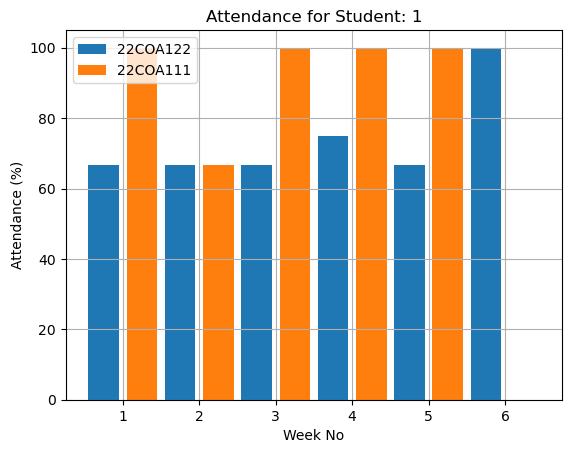

In [13]:
stu_att_figure = stu_att_graph(stu_att_df, mod1, mod2, student_ID)